# Wine Data Set

Using chemical analysis determine the origin of wines

Data obtained from http://archive.ics.uci.edu/ml/datasets/Wine

one of the curated data sets from the UC Irvine Machine Learning Repository https://archive.ics.uci.edu/ml/index.php

In [1]:
import pandas as pd

In [2]:
data_file = 'data/wine.data'
columns = [
    'class',
    'alcohol',
    'malic acid',
    'ash',
    'alkalinity of ash',
    'magnesium',
    'total phenols',
    'flavinoids',
    'nonflavinoid phenols',
    'proanthocyanins',
    'color intensity',
    'hue',
    'od280/od315',
    'proline'
]
df = pd.read_csv(data_file, names=columns)

In [3]:
df

,class,alcohol,malic acid,ash,alkalinity of ash,magnesium,total phenols,flavinoids,nonflavinoid phenols,proanthocyanins,color intensity,hue,od280/od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
import seaborn as sns

<AxesSubplot:xlabel='magnesium', ylabel='proline'>

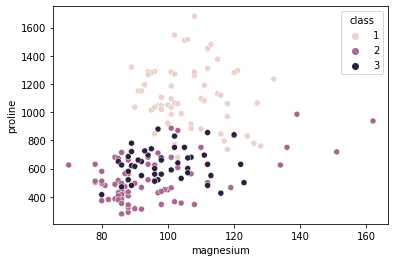

In [5]:
sns.scatterplot(x='magnesium', y='proline', hue='class', data=df)

In [6]:
from sklearn import decomposition

In [7]:
pca = decomposition.PCA(n_components=5, whiten=True)
res = pca.fit_transform(df[columns[1:]])

In [8]:
rdf = pd.DataFrame(res, columns=['pc1', 'pc2', 'pc3'])

ValueError: Shape of passed values is (178, 5), indices imply (178, 3)

In [9]:
rdf['class'] = df['class']

NameError: name 'rdf' is not defined

In [103]:
def do_pca(df, components=3):
    pca = decomposition.PCA(n_components=components, whiten=True)
    res = pca.fit_transform(df[columns[1:]])
    labels = ['pc{}'.format(i + 1) for i in range(components)]
    pcdf = pd.DataFrame(res, columns=labels)
    pcdf['class'] = df['class']
    return pcdf

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

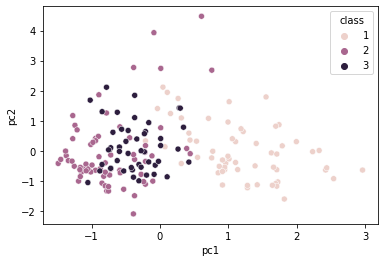

In [37]:
sns.scatterplot(x='pc1', y='pc2', hue='class', data=rdf)

<AxesSubplot:xlabel='pc1', ylabel='pc3'>

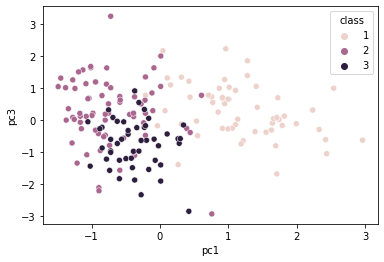

In [36]:
sns.scatterplot(x='pc1', y='pc3', hue='class', data=rdf)

<AxesSubplot:xlabel='pc2', ylabel='pc3'>

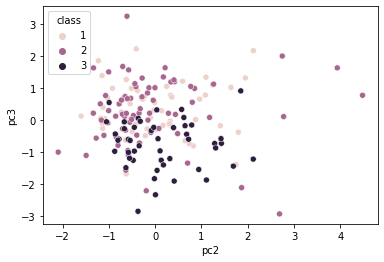

In [38]:
sns.scatterplot(x='pc2', y='pc3', hue='class', data=rdf)

## clustering

In [39]:
cluster_with_my_favorite_settings

In [69]:

def get_colors(ncolors):
    if ncolors < 10:
        return sns.color_palette(palette='tab10', n_colors=ncolors)
    if ncolors < 20:
        return sns.color_palette(palette='tab20', n_colors=ncolors)
    else:
        print("Too many colors requested, only providing 20")
        return sns.color_palette(palette='tab20', n_colors=ncolors)

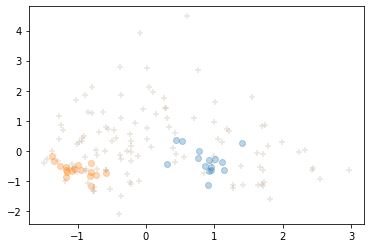

In [102]:
clust = OPTICS(min_samples=10, metric='minkowski')
clust.fit(rdf)

ncolors = max(clust.labels_)
colors = get_colors(ncolors)

fig, ax = plt.subplots()
for cat, color in zip(range(0, 5), colors):
    Xk = rdf[clust.labels_ == cat].copy()
    ax.scatter(Xk['pc1'], Xk['pc2'], color=color, alpha=0.3)
    sel_no_cluster = clust.labels_ == -1
    ax.scatter(rdf.loc[sel_no_cluster]['pc1'], rdf.loc[sel_no_cluster]['pc2'], marker="+", alpha=0.1)

In [ ]:
def cluster_with_my_favorite_settings(df, pcdf):
    clust = OPTICS(min_samples=10, metric='minkowski')
    clust.fit(df)

    ncolors = max(clust.labels_)
    colors = get_colors(ncolors)

    fig, ax = plt.subplots()
    for cat, color in zip(range(0, 5), colors):
        Xk = pcdf[clust.labels_ == cat].copy()
        ax.scatter(Xk['pc1'], Xk['pc2'], color=color, alpha=0.3)
        sel_no_cluster = clust.labels_ == -1
        ax.scatter(pcdf.loc[sel_no_cluster]['pc1'], pcdf.loc[sel_no_cluster]['pc2'], marker="+", alpha=0.1)